# Feature Selection - Mutual Information Gain (Entropy) For Classification

## Mutual Information

In probability theory and information theory, the mutual information (MI) of two random variables is a measure of the mutual dependence between the two variables. More specifically, it quantifies the "amount of information" (in units such as shannons, commonly called bits) obtained about one random variable through observing the other random variable. The concept of mutual information is intimately linked to that of entropy of a random variable, a fundamental notion in information theory that quantifies the expected "amount of information" held in a random variable.

Download Data Files https://github.com/laxmimerit/Data-Files-for-Feature-Selection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# VarianceThreshold - Feature selector that removes all low-variance features.
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [3]:
data = pd.read_csv("data/santander.csv", nrows=20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
x = data.drop("TARGET", axis=1) # Features
y = data["TARGET"] # Outcome

x.shape, y.shape

((20000, 370), (20000,))

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16000, 370), (4000, 370), (16000,), (4000,))

### Constant Features Removal

In [6]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(x_train)

VarianceThreshold(threshold=0)

In [7]:
# No. of features after constants removal
constant_filter.get_support().sum()

291

In [8]:
# Returns True for all the features which are constants.
constant_list = [not temp for temp in constant_filter.get_support()] # Inversing the True to False and False to True
constant_list

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Fa

In [9]:
# Name of all the features which are constants
x.columns[constant_list]

Index(['ind_var2_0', 'ind_var2', 'ind_var13_medio_0', 'ind_var13_medio',
       'ind_var18_0', 'ind_var18', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var34_0', 'ind_var34', 'ind_var41', 'ind_var46_0',
       'ind_var46', 'num_var13_medio_0', 'num_var13_medio', 'num_var18_0',
       'num_var18', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27',
       'num_var34_0', 'num_var34', 'num_var41', 'num_var46_0', 'num_var46',
       'saldo_var13_medio', 'saldo_var18', 'saldo_var28', 'saldo_var27',
       'saldo_var34', 'saldo_var41', 'saldo_var46',
       'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3',
       'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_out_1y3',
       'delta_imp_trasp_var33_out_1y3', 'delta_num_reemb_var33_1y3',
       'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_out_1y3',
       'imp_amort_var18_hace3', 'imp_amort_var18_ult1',
       'imp_amort_var34_hace3', 'imp_amort_var34_ult1', 'imp_var7_emit_ult1',
       'imp

In [10]:
# removing all the constants from our Training and Test dataset.
x_train_filter = constant_filter.transform(x_train)
x_test_filter = constant_filter.transform(x_test)

In [11]:
# Now take a look at the original and the transformed data (after removing the constants)
x_train.shape, x_test.shape, x_train_filter.shape, x_test_filter.shape

((16000, 370), (4000, 370), (16000, 291), (4000, 291))

## Quasi Constants Feature Removal

In [12]:
quasi_constant_filter = VarianceThreshold(threshold=0.01)

In [13]:
quasi_constant_filter.fit(x_train_filter)

VarianceThreshold(threshold=0.01)

In [14]:
quasi_constant_filter.get_support().sum()

245

In [15]:
x_train_quasi_filter = quasi_constant_filter.transform(x_train_filter)
x_test_quasi_filter = quasi_constant_filter.transform(x_test_filter)

In [16]:
# Now take a look at the original and the transformed data (after removing the constants)
x_train.shape, x_test.shape, x_train_filter.shape, x_test_filter.shape, x_train_quasi_filter.shape, x_train_quasi_filter.shape

((16000, 370),
 (4000, 370),
 (16000, 291),
 (4000, 291),
 (16000, 245),
 (16000, 245))

## Duplicate Features Removal

In [17]:
x_train_T = x_train_quasi_filter.T
x_test_T = x_test_quasi_filter.T

In [18]:
# As we can see the pandas dataframe has been transformed in to numpy array after transpose.
type(x_train_T)

numpy.ndarray

In [19]:
# Changing numpy array back to pandas dataframe
x_train_T = pd.DataFrame(x_train_T)
x_test_T = pd.DataFrame(x_test_T)

In [20]:
# Now we can see after transpose the rows has become columns and columns has become rows.
x_train_T.shape, x_test_T.shape

((245, 16000), (245, 4000))

In [21]:
# Getting duplicate features count
x_train_T.duplicated().sum()

18

In [22]:
duplicated_features = x_train_T.duplicated()
duplicated_features

# True is duplicated and False is non duplicated rows.

0      False
1      False
2      False
3      False
4      False
       ...  
240    False
241    False
242    False
243    False
244    False
Length: 245, dtype: bool

In [23]:
# Removing duppicated features.
# After this the False becomes True and True becomes false.

# Inversing the True to False and False to True
features_to_keep = [not index for index in duplicated_features]
features_to_keep

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 Fals

In [24]:
# Final dataset after removing constants, quasi constants and duplicates.

# Transposing again to original form
x_train_unique = x_train_T[features_to_keep].T 

# Transposing again to original form
x_test_unique = x_test_T[features_to_keep].T

In [25]:
x_train.shape, x_test.shape, x_train_unique.shape, x_test_unique.shape

((16000, 370), (4000, 370), (16000, 227), (4000, 227))

## Build Model and Compare the Performance after and before removal.

In [26]:
def run_random_forest(x_train, x_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print("Accuracy on test set: ")
    print(accuracy_score(y_test, y_pred))

In [27]:
%%time
# Run on final data.
run_random_forest(x_train_unique, x_test_unique, y_train, y_test)

Accuracy on test set: 
0.95875
CPU times: user 6.77 s, sys: 145 ms, total: 6.92 s
Wall time: 3.16 s


In [28]:
%%time
# Run on original data.
run_random_forest(x_train, x_test, y_train, y_test)

Accuracy on test set: 
0.9585
CPU times: user 7.62 s, sys: 145 ms, total: 7.77 s
Wall time: 2.33 s


As we can see the accuracy and time taken is less after removing the constants, quasi constants and duplicates compare to the original data. 

What we can say here is that removing constants, quasi constants and duplicates doesn't depricates the accuracy it rather improves it.

## Calculate Mutual Information

In [29]:
mi = mutual_info_classif(x_train_unique, y_train)

In [30]:
len(mi)

227

In [31]:
mi

array([2.62329918e-03, 3.19975778e-04, 1.17847630e-02, 7.76194348e-04,
       1.02712342e-03, 3.78196628e-03, 3.87873565e-04, 4.73028177e-05,
       7.20880382e-04, 5.90715761e-04, 4.42164022e-04, 7.26399981e-04,
       2.43385111e-03, 3.80647496e-03, 0.00000000e+00, 0.00000000e+00,
       1.53153487e-04, 2.02549515e-03, 1.70314585e-03, 6.71360148e-04,
       7.72047294e-04, 2.33779253e-03, 7.27879707e-03, 7.32474080e-04,
       4.27358967e-04, 2.89167610e-03, 1.14666424e-03, 0.00000000e+00,
       9.76129756e-04, 0.00000000e+00, 3.97545670e-03, 0.00000000e+00,
       6.57383727e-05, 4.58939387e-04, 0.00000000e+00, 1.00482564e-03,
       3.25309656e-04, 0.00000000e+00, 1.07643154e-02, 3.22468250e-03,
       2.25564213e-03, 2.12490521e-03, 1.35081349e-03, 2.35913360e-03,
       0.00000000e+00, 1.04044560e-02, 3.68637215e-03, 9.44068755e-03,
       9.38895311e-04, 1.43049837e-03, 1.66158765e-03, 0.00000000e+00,
       2.31015973e-03, 2.02067715e-03, 1.82057550e-03, 0.00000000e+00,
      

In [32]:
mi = pd.Series(mi)
mi.index = x_train_unique.columns

In [33]:
mi.sort_values(ascending=False, inplace=True)

<AxesSubplot:>

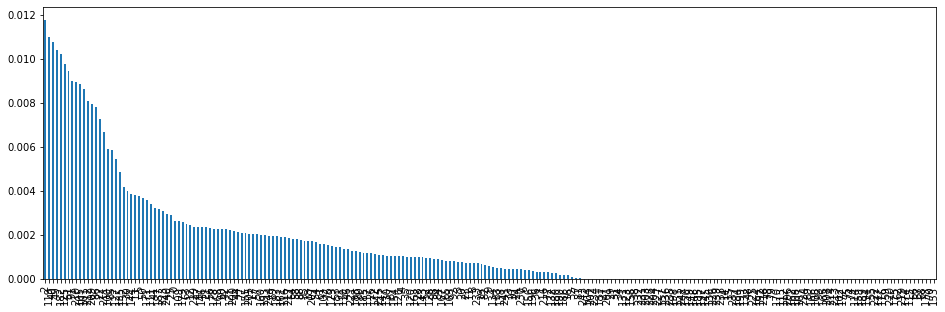

In [35]:
mi.plot.bar(figsize=(16, 5))

As you can see after certain level there is not much information

In [36]:
# As you can see after certain level there is not much information.
# Selecting only certain percentile of entire data.
sel = SelectPercentile(mutual_info_classif, percentile=10).fit(x_train_unique, y_train)

In [37]:
x_train_unique.columns[sel.get_support()]

Int64Index([  2,  22,  40,  44,  49,  50,  51,  86,  91,  95, 101, 105, 119,
            125, 127, 175, 182, 187, 209, 210, 211, 212, 217],
           dtype='int64')

In [38]:
len(x_train_unique.columns[sel.get_support()])

23

In [39]:
help(sel)

Help on SelectPercentile in module sklearn.feature_selection._univariate_selection object:

class SelectPercentile(_BaseFilter)
 |  SelectPercentile(score_func=<function f_classif at 0x7f9a0fcd14d0>, *, percentile=10)
 |  
 |  Select features according to a percentile of the highest scores.
 |  
 |  Read more in the :ref:`User Guide <univariate_feature_selection>`.
 |  
 |  Parameters
 |  ----------
 |  score_func : callable
 |      Function taking two arrays X and y, and returning a pair of arrays
 |      (scores, pvalues) or a single array with scores.
 |      Default is f_classif (see below "See also"). The default function only
 |      works with classification tasks.
 |  
 |      .. versionadded:: 0.18
 |  
 |  percentile : int, optional, default=10
 |      Percent of features to keep.
 |  
 |  Attributes
 |  ----------
 |  scores_ : array-like of shape (n_features,)
 |      Scores of features.
 |  
 |  pvalues_ : array-like of shape (n_features,)
 |      p-values of feature score

In [40]:
x_train_mi = sel.transform(x_train_unique)
x_test_mi = sel.transform(x_test_unique)

In [41]:
x_train_mi.shape, x_test_mi.shape

((16000, 23), (4000, 23))

In [43]:
%%time
run_random_forest(x_train_mi, x_test_mi, y_train, y_test)

Accuracy on test set: 
0.9585
CPU times: user 2.27 s, sys: 85.6 ms, total: 2.36 s
Wall time: 1 s


## Mutual Information Gain in Regression

In [44]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [45]:
boston = load_boston()

In [46]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [47]:
x = pd.DataFrame(data = boston.data, columns=boston.feature_names)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [48]:
y = boston.target

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [50]:
mi = mutual_info_regression(x_train, y_train)
mi = pd.Series(mi)
mi.index = x_train.columns
mi.sort_values(ascending=False, inplace=True)

In [51]:
# Now we can see which feature is giving more information
mi

LSTAT      0.678952
RM         0.558885
INDUS      0.524202
PTRATIO    0.484961
NOX        0.455108
TAX        0.392372
CRIM       0.365538
AGE        0.343287
DIS        0.321535
RAD        0.215814
ZN         0.197470
B          0.157357
CHAS       0.010487
dtype: float64

<AxesSubplot:>

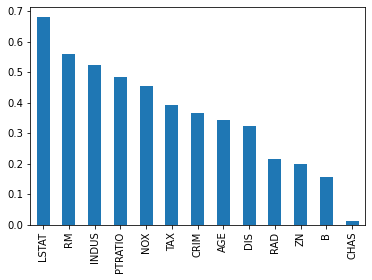

In [52]:
mi.plot.bar()

In [53]:
sel = SelectKBest(mutual_info_regression, k=9).fit(x_train, y_train)

In [54]:
x_train.columns[sel.get_support()]

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

#### Calculate r2_score, mean_squared_error and SD for full feature

In [55]:
model = LinearRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [56]:
r2_score(y_test, y_predict)

0.5892223849182504

In [57]:
# Root Mean Squared Error (RMSE)
np.sqrt(mean_squared_error(y_test, y_predict))

5.783509315085138

In [58]:
# Standard Deviation
np.std(y)

9.188011545278203

#### Calculate r2_score, mean_squared_error and SD for selected feature

In [65]:
# Calculating for selected features
x_train_9 = sel.transform(x_train)
x_train_9.shape

(404, 9)

In [66]:
x_test_9 = sel.transform(x_test)
x_test_9.shape

(102, 9)

In [68]:
model = LinearRegression()
model.fit(x_train_9, y_train)
y_predict_9 = model.predict(x_test_9)

In [69]:
r2_score(y_test, y_predict_9)

0.5317127606961575

In [70]:
# Root Mean Squared Error (RMSE)
np.sqrt(mean_squared_error(y_test, y_predict_9))

6.175103151293748